<a href="https://colab.research.google.com/github/davidofitaly/05_ml_clustering_projects/blob/main/03_dbscan_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents:
1. [Import of libraries](#0)
2. [Data generation](#1)
3. [Visualization created data](#2)
4. [DBSCAN](#3)


In [1]:
# Import the necessary libraries
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

sns.set(font_scale=1.1)
# Print the version of the imported libraries for reference
print(f'Pandas: {pd.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Numpy: {np.__version__}')

Pandas: 2.2.2
Seaborn: 0.13.2
Numpy: 1.26.4


### <a name='1'> </a> Data generation

In [2]:
# Import make_blobs datasets
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=1000, centers=4, cluster_std=1.3, center_box=(-8.0, 8.0), random_state=42)[0]

# Create DataFrame
df = pd.DataFrame(data, columns=['x1', 'x2'])
df

,x1,x2
0,-6.702388,5.522242
1,-4.538978,-5.115007
2,-4.777877,-5.405281
3,3.114734,0.473738
4,3.374434,-0.375550
...,...,...
995,-2.823747,-3.933212
996,-1.196002,8.028278
997,2.477685,5.000632
998,-6.296068,-5.747150


### <a name='2'> </a> Visualization created data

In [3]:
# Create a scatter plot to visualize the clustering of the data points
px.scatter(df, 'x1', 'x2', width=1000, height=500, title='Clusterization', template='ggplot2')

### <a name='3'> </a> DBSCAN

#### first model

- eps = 0.5 min_samples = 5

In [4]:
cluster = DBSCAN(eps = 0.5, min_samples=5)
cluster.fit(data)

DBSCAN()

In [5]:
labels = cluster.labels_

In [6]:
df['cluster'] = labels

df.head()

,x1,x2,cluster
0,-6.702388,5.522242,0
1,-4.538978,-5.115007,1
2,-4.777877,-5.405281,1
3,3.114734,0.473738,2
4,3.374434,-0.375550,2


- visualization

In [8]:
px.scatter(df, 'x1', 'x2', 'cluster', width=1000, height=500, title= 'DBSCAN(eps=0.5, min_samples=5)', color_continuous_midpoint=0, template='plotly_dark')

- Silhouette

In [9]:
# Calculation of the silhuet coefficient
# Important: you must discard points that do not belong to any cluster (marked as -1)
if len(set(labels)) > 1:  # # Checking whether there are at least two clusters
    silhouette_avg = silhouette_score(data, labels)
    print(f'Silhouette Score: {silhouette_avg:.4f}')
else:
    print('Not enough clusters to calculate silhouette score.')

Silhouette Score: -0.1939


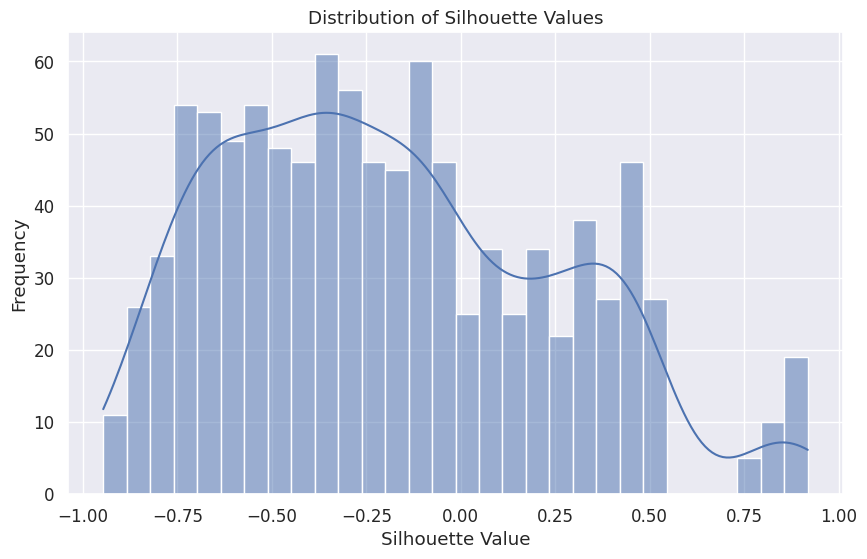

In [10]:
# Adding silhuet values to the DataFrame
silhouette_vals = silhouette_samples(data, labels)
df['silhouette_vals'] = silhouette_vals

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['silhouette_vals'], bins=30, kde=True)
plt.title('Distribution of Silhouette Values')
plt.xlabel('Silhouette Value')
plt.ylabel('Frequency')
plt.show()

#### second model

- eps=0.6 min_samples=8

In [ ]:
cluster = DBSCAN(eps=0.6, min_samples=8)
cluster.fit(data)

DBSCAN(eps=0.6, min_samples=8)

In [ ]:
labels = cluster.labels_

In [ ]:
df['cluster'] = labels

df.head()

,x1,x2,cluster,silhouette_vals
0,-6.702388,5.522242,0,0.592804
1,-4.538978,-5.115007,1,0.827592
2,-4.777877,-5.405281,1,0.841909
3,3.114734,0.473738,2,0.780639
4,3.374434,-0.375550,2,0.730130


- visualization

In [ ]:
px.scatter(df, 'x1', 'x2', 'cluster', width=1000, height=500, title= 'DBSCAN(eps=0.6, min_samples=8)', color_continuous_midpoint=0, template='plotly_dark')

- Silhouette

In [ ]:
# Calculation of the silhuet coefficient
# Important: you must discard points that do not belong to any cluster (marked as -1)
if len(set(labels)) > 1:  # # Checking whether there are at least two clusters
    silhouette_avg = silhouette_score(data, labels)
    print(f'Silhouette Score: {silhouette_avg:.4f}')
else:
    print('Not enough clusters to calculate silhouette score.')

Silhouette Score: 0.5034


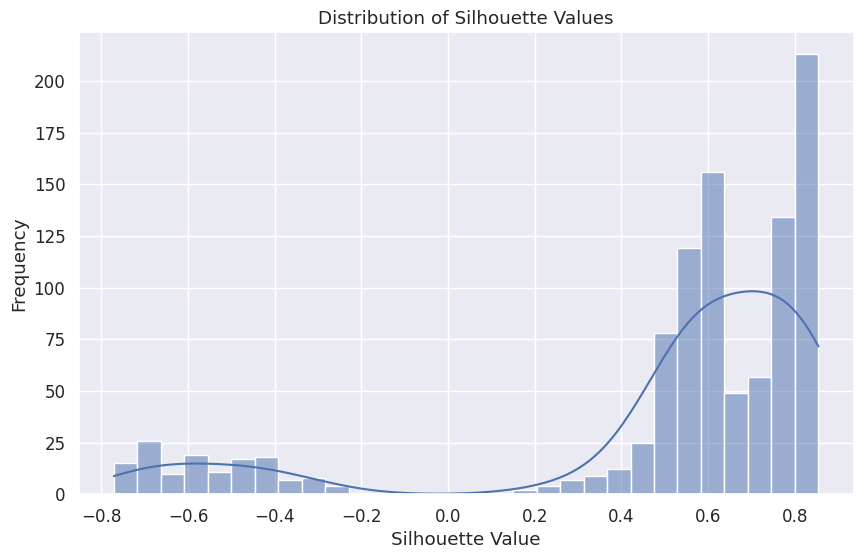

In [ ]:
# Adding silhuet values to the DataFrame
silhouette_vals = silhouette_samples(data, labels)
df['silhouette_vals'] = silhouette_vals

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['silhouette_vals'], bins=30, kde=True)
plt.title('Distribution of Silhouette Values')
plt.xlabel('Silhouette Value')
plt.ylabel('Frequency')

plt.show()

#### third model

- eps=0.8 min_samples=10

In [ ]:
cluster = DBSCAN(eps=0.8, min_samples=10)
cluster.fit(data)

DBSCAN(eps=0.8, min_samples=10)

In [ ]:
labels = cluster.labels_

In [ ]:
df['cluster'] = labels

df.head()

,x1,x2,cluster,silhouette_vals
0,-6.702388,5.522242,0,0.593528
1,-4.538978,-5.115007,1,0.830902
2,-4.777877,-5.405281,1,0.844810
3,3.114734,0.473738,2,0.780353
4,3.374434,-0.375550,2,0.732059


In [ ]:
px.scatter(df, 'x1', 'x2', 'cluster', width=1000, height=500, title= 'DBSCAN(eps=0.7, min_samples=5)', color_continuous_midpoint=0, template='plotly_dark')

- Silhouette

In [ ]:
# Calculation of the silhuet coefficient
# Important: you must discard points that do not belong to any cluster (marked as -1)
if len(set(labels)) > 1:  # # Checking whether there are at least two clusters
    silhouette_avg = silhouette_score(data, labels)
    print(f'Silhouette Score: {silhouette_avg:.4f}')
else:
    print('Not enough clusters to calculate silhouette score.')

Silhouette Score: 0.5675


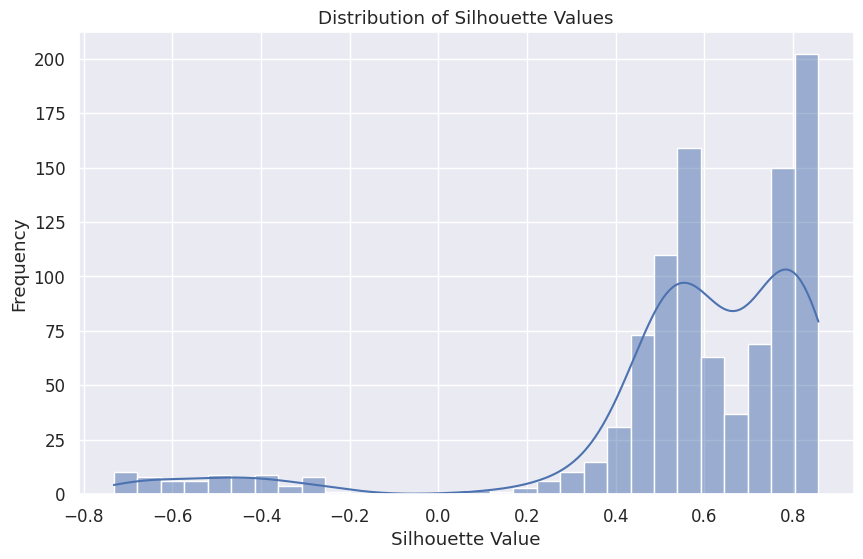

In [ ]:
# Adding silhuet values to the DataFrame
silhouette_vals = silhouette_samples(data, labels)
df['silhouette_vals'] = silhouette_vals

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['silhouette_vals'], bins=30, kde=True)
plt.title('Distribution of Silhouette Values')
plt.xlabel('Silhouette Value')
plt.ylabel('Frequency')

plt.show()